In [1]:
import pandas as pd
from cleantext import clean
from unidecode import unidecode
import re
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from matplotlib import pyplot as plt
from collections import OrderedDict
import math

In [2]:
#read_csv
file_2018=pd.read_csv('/Users/cathy/Desktop/Neu DAE/IE5374/project3/data/2018.csv')
file_2019=pd.read_csv('/Users/cathy/Desktop/Neu DAE/IE5374/project3/data/2019.csv')
file_2020=pd.read_csv('/Users/cathy/Desktop/Neu DAE/IE5374/project3/data/2020.csv')
file_2021=pd.read_csv('/Users/cathy/Desktop/Neu DAE/IE5374/project3/data/2021.csv')
file_2022=pd.read_csv('/Users/cathy/Desktop/Neu DAE/IE5374/project3/data/2022.csv')

In [3]:
#get the column we need
tweet_2018=file_2018['tweet']
tweet_2019=file_2019['tweet']
tweet_2020=file_2020['tweet']
tweet_2021=file_2021['tweet']
tweet_2022=file_2022['tweet']
tweet_2022.tail()

1023                https://t.co/LA9hPzVlGx
1024    Let’s make the roaring 20’s happen!
1025    Great work by Tesla team worldwide!
1026                      @BLKMDL3 @Tesla 🔥
1027      @MiFSDBetaTester @WholeMarsBlog 🤣
Name: tweet, dtype: object

In [4]:
#just in case, we check the language of text, even though there are different kinds of languages, most of them follow English grammar.
language=file_2022['language']
display(language.unique())
display(file_2022[file_2022['language']=='fr']['tweet'])

array(['en', 'und', 'tl', 'de', 'in', 'ca', 'fr', 'tr', 'pt', 'it', 'lt'],
      dtype=object)

137    @TPostMillennial Hypocritical megadouche!
257                                     [Satire]
372                              Je m’aple syrup
651    @TPostMillennial Hypocritical megadouche!
771                                     [Satire]
886                              Je m’aple syrup
Name: tweet, dtype: object

In [5]:
#data cleaning
#remove emoji,urls,punctuation

#function to remove urls
def remove_urls (text):
    text = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', text, flags=re.MULTILINE)
    return(text)

#function to remove punctuation
def remove_punc (text):
    text = re.sub(r'[^\w\s]', '', text,flags=re.MULTILINE)
    return(text)

#function to remove numbers
def cleaning_numbers(text):
    return re.sub('[0-9]+', '', text)

#function to remove repeating_character
def cleaning_repeating_char(text):
    return re.sub("(.)\\1{2,}", "\\1", text)

#function to remove single letter
def cleaning_single_letter(text):
    return re.sub(r'(?:^| )\w(?:$| )', ' ', text).strip()


#function to remove all unnecessary things
def special_remove(data:pd.DataFrame):
    for i in range(0,data.shape[0]):
        text=data.loc[i]
        text=clean(text, no_emoji=True)#remove emoji
        text=remove_urls(text)#remove urls
        text=remove_punc(text)#remove punctuation
        text=cleaning_numbers(text) #remove number
        text=cleaning_repeating_char(text) #remove repeating character
        text=cleaning_single_letter(text) #remove single letter
        text=text.strip()#remove white space
        data.loc[i]=text
    return data


In [6]:
special_remove(tweet_2018)
special_remove(tweet_2019)
special_remove(tweet_2020)
special_remove(tweet_2021)
special_remove(tweet_2022).tail()

/var/folders/th/k5zz5b0s7911bg8b9k8fwwwr0000gn/T/ipykernel_2538/3077387674.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[i]=text


1023                                      
1024          lets make the roaring happen
1025    great work by tesla team worldwide
1026                          blkmdl tesla
1027         mifsdbetatester wholemarsblog
Name: tweet, dtype: object

In [7]:
#exculd stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

#function to tokenize the sentence and exclude stopwords
def word_token_stopword(tweet_list:list):
    word_tokens=[]
    filtered_word = []
    for tweet in tweet_list:#wordtokenize
        word_tokens.append(word_tokenize(tweet))
        
    word_tokens=list(np.concatenate(word_tokens).flat)

    for w in word_tokens:#exclude stopwords
        if w not in stop_words:
            filtered_word.append(w)
            
    return filtered_word

[nltk_data] Downloading package stopwords to /Users/cathy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
tweetlist_2018=tweet_2018.values.tolist()
word_2018=word_token_stopword(tweetlist_2018)

tweetlist_2019=tweet_2019.values.tolist()
word_2019=word_token_stopword(tweetlist_2019)

tweetlist_2020=tweet_2020.values.tolist()
word_2020=word_token_stopword(tweetlist_2020)

tweetlist_2021=tweet_2021.values.tolist()
word_2021=word_token_stopword(tweetlist_2021)

tweetlist_2022=tweet_2022.values.tolist()
word_2022=word_token_stopword(tweetlist_2022)

In [9]:
#fucntion to do WordNetLemmatizer and remove the generated single letter

from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lem_remove_single_letter(wordlist:list):
    lem_sent= [lemmatizer.lemmatize(this_word) for this_word in wordlist]
    
    lem_sent_n=[]
    for i in lem_sent:
        j=cleaning_single_letter(i)
        lem_sent_n.append(j)
    lem_sent_n= list(filter(None, lem_sent_n))
    
    return lem_sent_n

In [10]:
word_2018_lem= lem_remove_single_letter(word_2018)
total_2018=set(word_2018_lem)

word_2019_lem= lem_remove_single_letter(word_2019)
total_2019=set(word_2019_lem)

word_2020_lem= lem_remove_single_letter(word_2020)
total_2020=set(word_2020_lem)

word_2021_lem= lem_remove_single_letter(word_2021)
total_2021=set(word_2021_lem)

word_2022_lem= lem_remove_single_letter(word_2022)
total_2022=set(word_2022_lem)

1. Compute the term frequencies for each year. They should be normalized (scale of [0, 1]). Exclude stopwords.

In [11]:
#function to count word occurrence times
def wot(total:set,wordlist_ss:list):
    wordDict= dict.fromkeys(total, 0) 
    for word in wordlist_ss:
        wordDict[word]+=1
    wf=pd.DataFrame([wordDict]).sort_values(by=0,axis=1,ascending=False)
    return wf,wordDict

In [12]:
wf_2018,wordDict_2018=wot(total_2018,word_2018_lem)
wf_2019,wordDict_2019=wot(total_2019,word_2019_lem)
wf_2020,wordDict_2020=wot(total_2020,word_2020_lem)
wf_2021,wordDict_2021=wot(total_2021,word_2021_lem)
wf_2022,wordDict_2022=wot(total_2022,word_2022_lem)

In [13]:
#function to cumpute Term Frequncy
def computeTF(wordDict, doc):
    tfDict = {}
    corpusCount = len(doc)
    for word, count in wordDict.items():
        tfDict[word] = count/float(corpusCount)
    return(tfDict)

In [14]:
#running our tweet through the tf function:
tf_2018_dict = computeTF(wordDict_2018, word_2018_lem)
tf_2019_dict = computeTF(wordDict_2019, word_2019_lem)
tf_2020_dict = computeTF(wordDict_2020, word_2020_lem)
tf_2021_dict = computeTF(wordDict_2021, word_2021_lem)
tf_2022_dict = computeTF(wordDict_2022, word_2022_lem)

#Converting to dataframe for visualization and sorting
tf_2018 = pd.DataFrame([tf_2018_dict]).sort_values(by=0,axis=1,ascending=False)
tf_2019 = pd.DataFrame([tf_2019_dict]).sort_values(by=0,axis=1,ascending=False)
tf_2020 = pd.DataFrame([tf_2020_dict]).sort_values(by=0,axis=1,ascending=False)
tf_2021 = pd.DataFrame([tf_2021_dict]).sort_values(by=0,axis=1,ascending=False)
tf_2022 = pd.DataFrame([tf_2022_dict]).sort_values(by=0,axis=1,ascending=False)
display(tf_2018)
display(tf_2019)
display(tf_2020)
display(tf_2021)
display(tf_2022)

,tesla,car,yes,good,model,like,spacex,year,make,would,...,docjkcardinal,barrier,filled,publicfreeman,erect,gyano,financial,proprietary,shannonnullcode,compete
0,0.020686,0.008009,0.004897,0.004668,0.004577,0.004394,0.004027,0.003799,0.00357,0.003478,...,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046


,tesla,car,spacex,yes,model,good,like,erdayastronaut,year,would,...,curtismcauliff,cuteness,mindbody,attending,leoorlando,uretericbud,ryan_deitsch,hexagonal,schadlu,footwear
0,0.01843,0.0067,0.00592,0.005461,0.005238,0.005015,0.004458,0.004179,0.003998,0.003761,...,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014


,tesla,spacex,erdayastronaut,yes,car,good,flcnhvy,model,like,year,...,rebirth,coalmining,stephenson,braddock,moneymaker,rallied,simplified,marsmeditation,extremophile,footwear
0,0.017007,0.006334,0.005622,0.005542,0.005512,0.00474,0.004249,0.004069,0.003999,0.003889,...,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001


,tesla,spacex,wholemarsblog,teslaownerssv,ppathole,erdayastronaut,time,year,good,car,...,farm,satyanadella,deflationary,robxlynx,adamsinger,resistance,reporter,architectural,decrease,ashleydcan
0,0.013831,0.010342,0.007946,0.005003,0.004877,0.004666,0.004456,0.004372,0.004372,0.00433,...,0.000042,0.000042,0.000042,0.000042,0.000042,0.000042,0.000042,0.000042,0.000042,0.000042


,tesla,wholemarsblog,spacex,teslaownerssv,car,sawyermerritt,people,yes,one,billymk,...,sweden,moneymik,difficulty,techcrunch,nonrussian,vgdunkey,gpus,century,cnbcclosingbell,shortword
0,0.016403,0.012758,0.008505,0.007594,0.006379,0.005468,0.005164,0.00486,0.004557,0.004557,...,0.000304,0.000304,0.000304,0.000304,0.000304,0.000304,0.000304,0.000304,0.000304,0.000304


2. Show the top 10 words (for each year) by highest value of word frequency.

In [15]:
#select top10 words for each year
top10_2018=tf_2018.iloc[0,0:10]
top10_2019=tf_2019.iloc[0,0:10]
top10_2020=tf_2020.iloc[0,0:10]
top10_2021=tf_2021.iloc[0,0:10]
top10_2022=tf_2022.iloc[0,0:10]

In [16]:
#put top10 words for each year in one dataframe
top10_words_2018=list(top10_2018.index)
top10_words_2019=list(top10_2019.index)
top10_words_2020=list(top10_2020.index)
top10_words_2021=list(top10_2021.index)
top10_words_2022=list(top10_2022.index)

tf_top10_2018=list(top10_2018)
tf_top10_2019=list(top10_2019)
tf_top10_2020=list(top10_2020)
tf_top10_2021=list(top10_2021)
tf_top10_2022=list(top10_2022)

df_2018 = pd.DataFrame({'col1':top10_words_2018, 'col2': tf_top10_2018})
df_2019 = pd.DataFrame({'col1':top10_words_2019, 'col2': tf_top10_2019})
df_2020 = pd.DataFrame({'col1':top10_words_2020, 'col2': tf_top10_2020})
df_2021 = pd.DataFrame({'col1':top10_words_2021, 'col2': tf_top10_2021})
df_2022 = pd.DataFrame({'col1':top10_words_2022, 'col2': tf_top10_2022})

df_top10=pd.concat([df_2018, df_2019,df_2020,df_2021,df_2022], axis=1)

columns=[('2018', 'top10_words'), ('2018', 'tf'),('2019', 'top10_words'), ('2019', 'tf'),('2019', 'top10_words'), ('2020', 'tf'),('2021', 'top10_words'), ('2021', 'tf'),('2022', 'top10_words'), ('2022', 'tf')]

df_top10.columns = pd.MultiIndex.from_tuples(columns)
df_top10

2018                      2019                                2020  \
  top10_words        tf     top10_words        tf     top10_words        tf   
0       tesla  0.020686           tesla  0.018430           tesla  0.017007   
1         car  0.008009             car  0.006700          spacex  0.006334   
2         yes  0.004897          spacex  0.005920  erdayastronaut  0.005622   
3        good  0.004668             yes  0.005461             yes  0.005542   
4       model  0.004577           model  0.005238             car  0.005512   
5        like  0.004394            good  0.005015            good  0.004740   
6      spacex  0.004027            like  0.004458         flcnhvy  0.004249   
7        year  0.003799  erdayastronaut  0.004179           model  0.004069   
8        make  0.003570            year  0.003998            like  0.003999   
9       would  0.003478           would  0.003761            year  0.003889   

             2021                     2022            
      top10_words        tf    top10_words        tf  
0           tesla  0.013831          tesla  0.016403  
1          spacex  0.010342  wholemarsblog  0.012758  
2   wholemarsblog  0.007946         spacex  0.008505  
3   teslaownerssv  0.005003  teslaownerssv  0.007594  
4        ppathole  0.004877            car  0.006379  
5  erdayastronaut  0.004666  sawyermerritt  0.005468  
6            time  0.004456         people  0.005164  
7            year  0.004372            yes  0.004860  
8            good  0.004372            one  0.004557  
9             car  0.004330        billymk  0.004557

3. Plot a histogram of word frequencies for each year

As there are thousands of words for each year, we just pick the top 20 to plot the histogram

In [17]:
#function to plot the hist of word frequencies for each year

def hist_tf(tf):
    wordDict = tf.squeeze().to_dict()
    keys_w = list(wordDict.keys())
    values_w = list(wordDict.values())
    
    plt.figure(figsize=(25, 10))
    plt.bar(keys_w[0:20], values_w[0:20], label="Term Frequency")

    plt.ylabel ('Term Frequency')
    plt.xlabel ('Word')
   
    plt.legend (bbox_to_anchor=(1, 1), loc="upper right", borderaxespad=0.)
    plt.show()
    

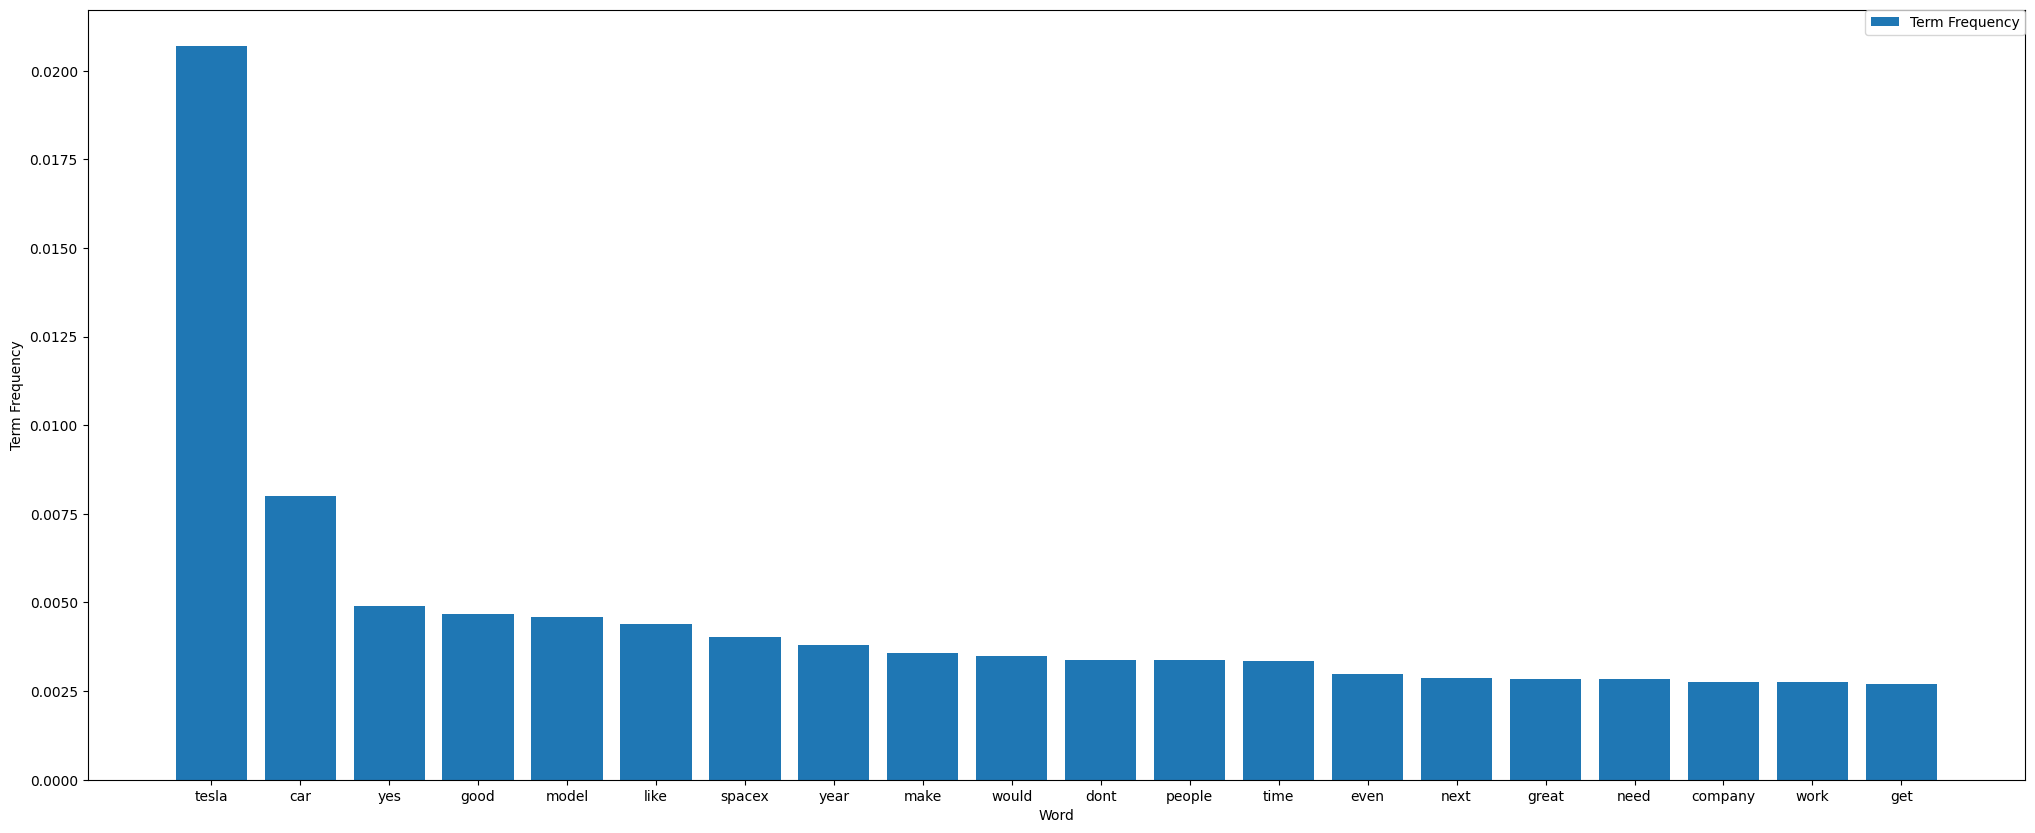

In [465]:
hist_tf(tf_2018)

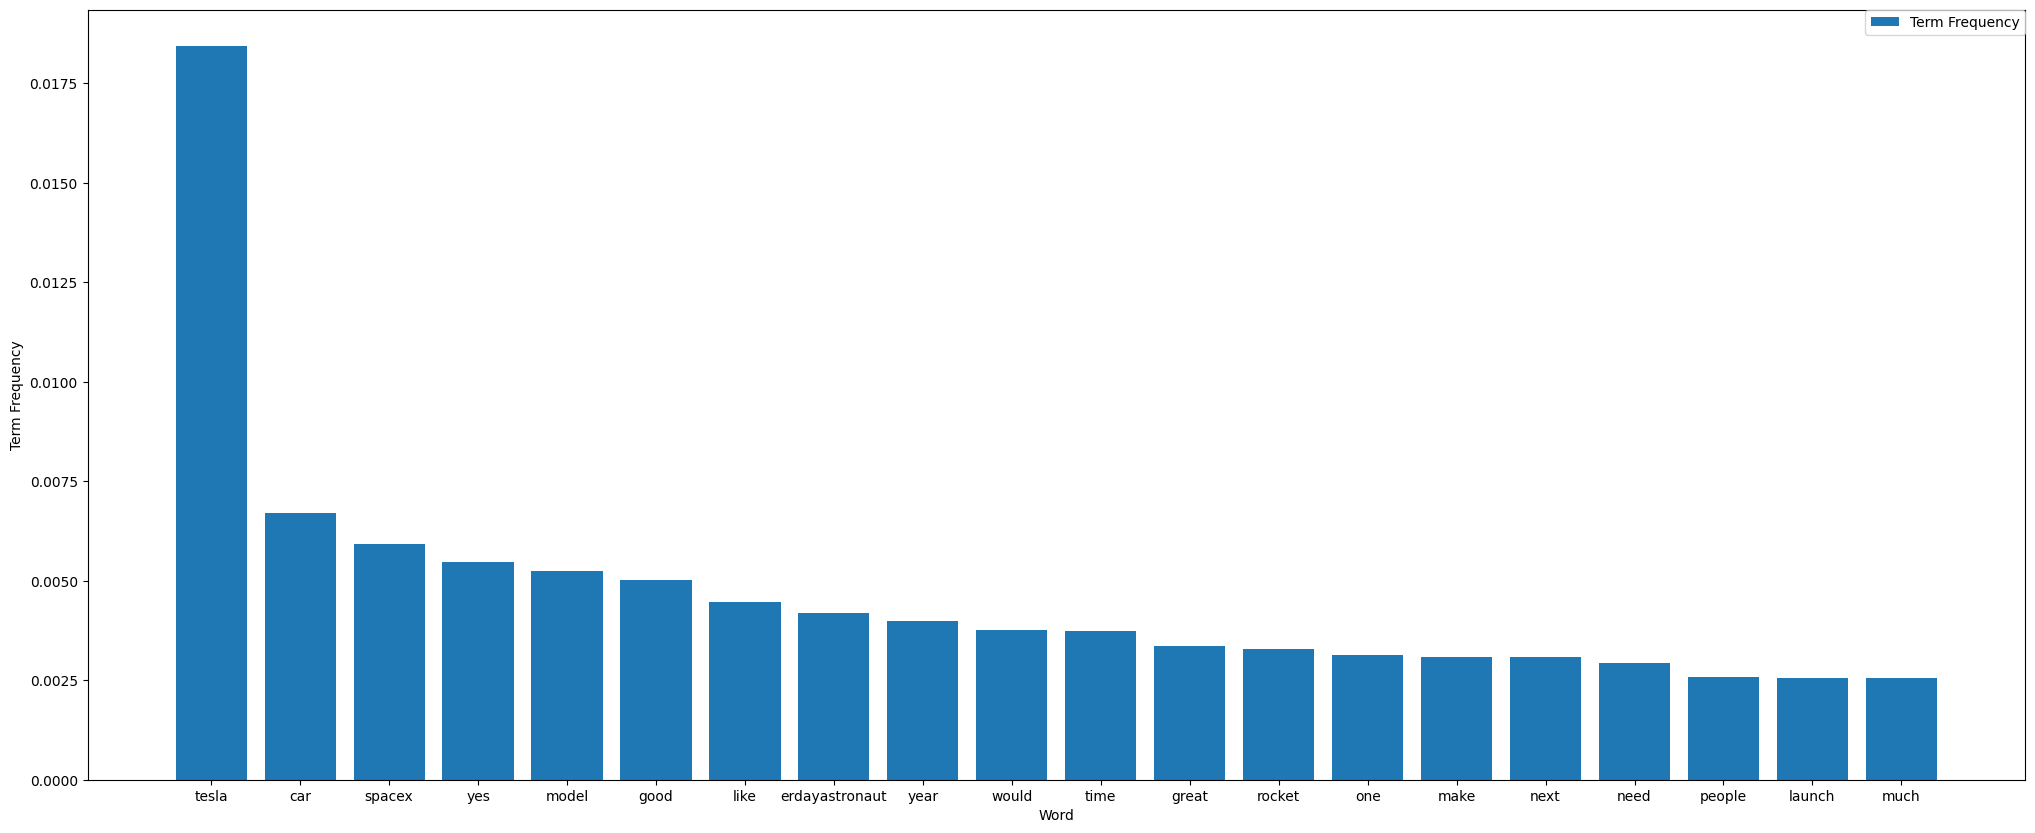

In [466]:
hist_tf(tf_2019)

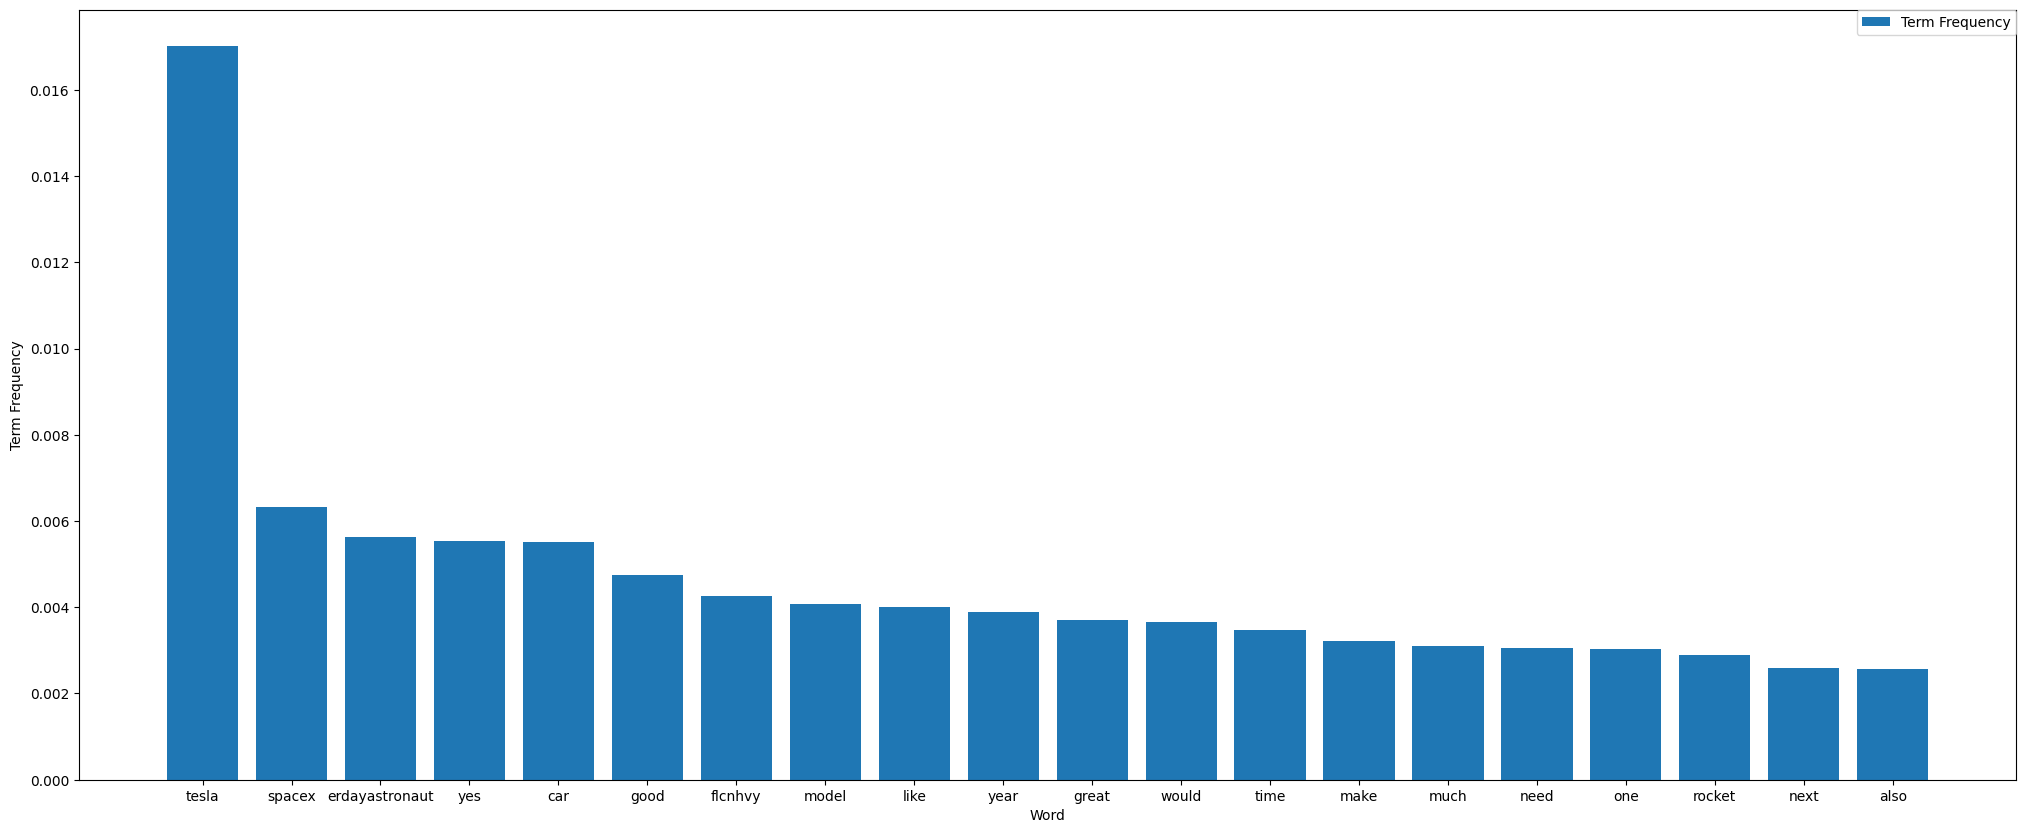

In [467]:
hist_tf(tf_2020)

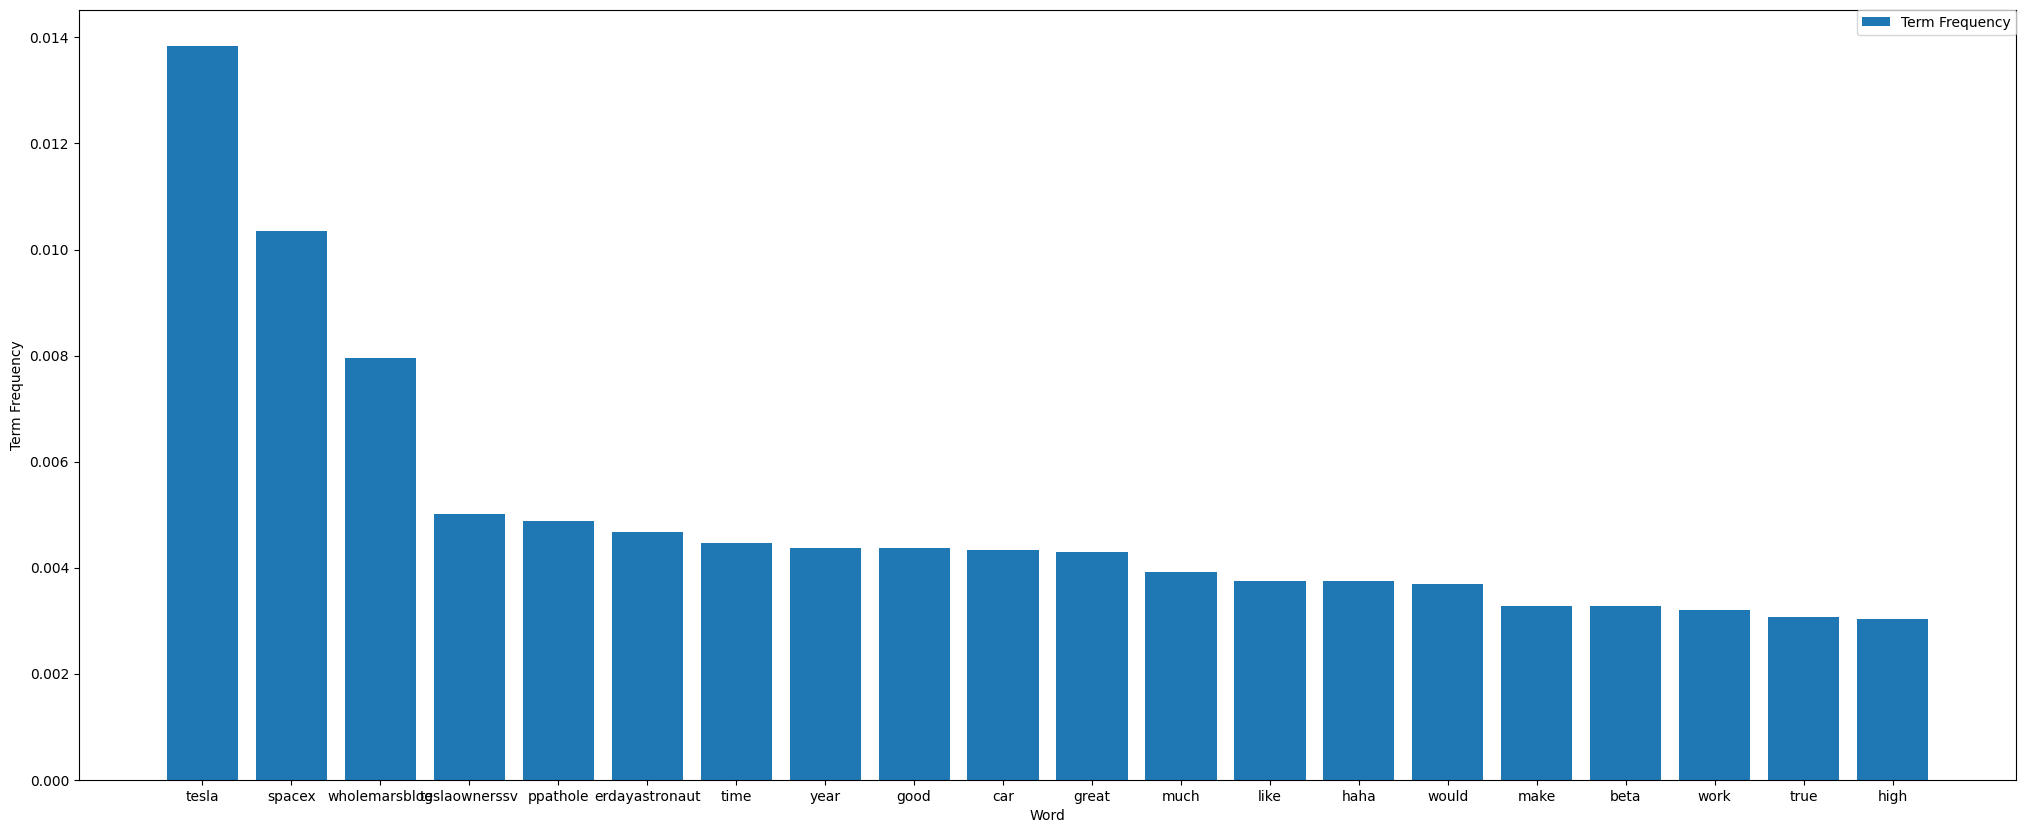

In [468]:
hist_tf(tf_2021)

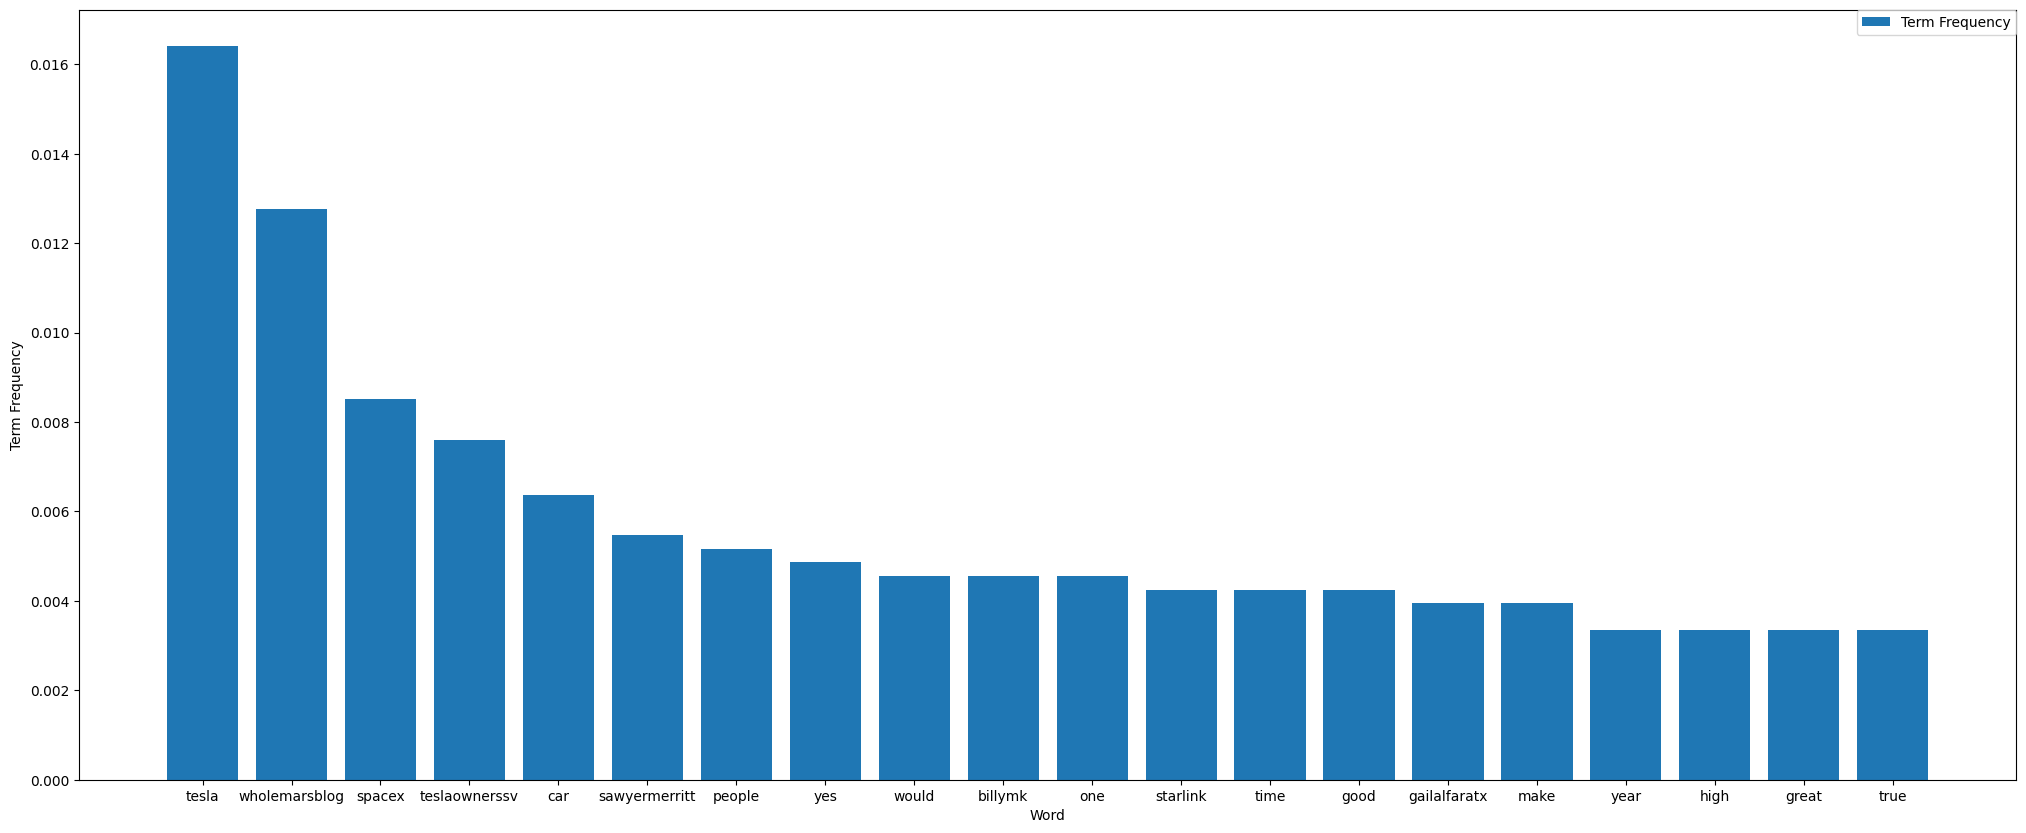

In [469]:
hist_tf(tf_2022)

4. Demonstrate Zipf’s law by plotting log-log plots of word frequencies v. rank for each year


###Zipf's law states that the frequency that a word appears is inversely proportional to its rank.


When we tried to generate a log-log plot with rank, the result showed terrace-shaped graph since there were a lot of words which have same occurances. So we used dense-rank in order to get the better shaped graph.

The result is a logarithmic curve and explains that zipf's law is valid.

In [ ]:
def plot_loglog(df):
    df = df.transpose()
    df.columns = ['freq']
    df['rank'] = df.freq.rank(method='dense', ascending=False).astype(int)
    plt.figure(figsize=(10, 10))
    plt.title("log-log plot")
    plt.ylabel("Frequency")
    plt.xlabel("Rank")
    plt.loglog(df['rank'], df['freq'], basex=10, basey=10)
    plt.show()

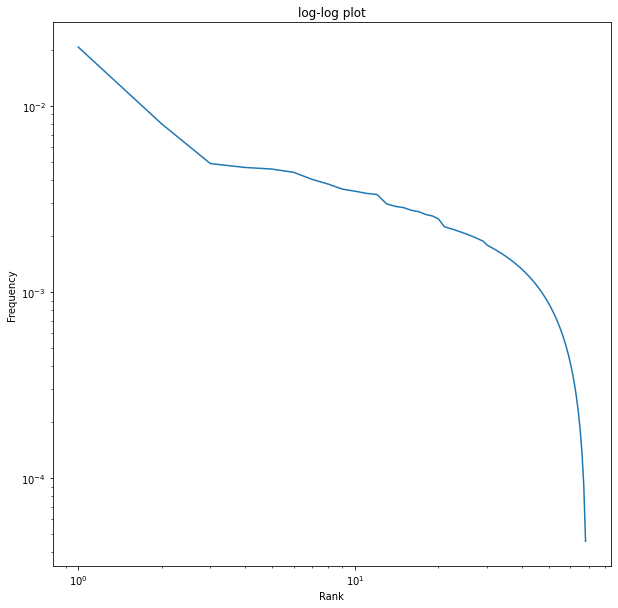

In [ ]:
plot_loglog(tf_2018)

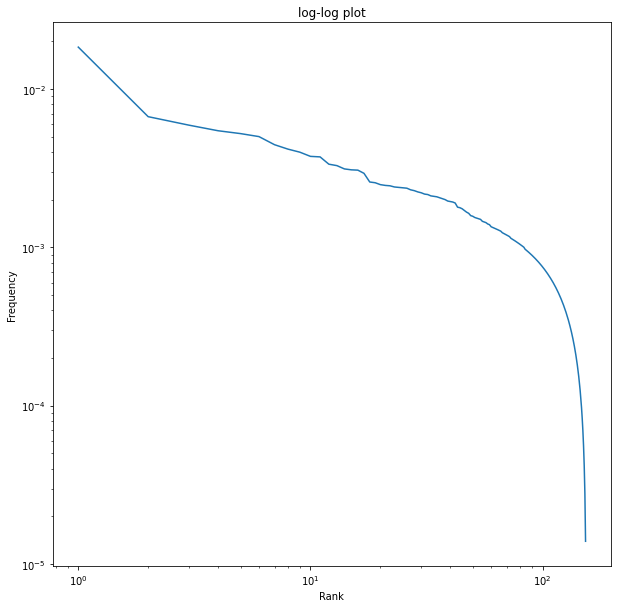

In [ ]:
plot_loglog(tf_2019)

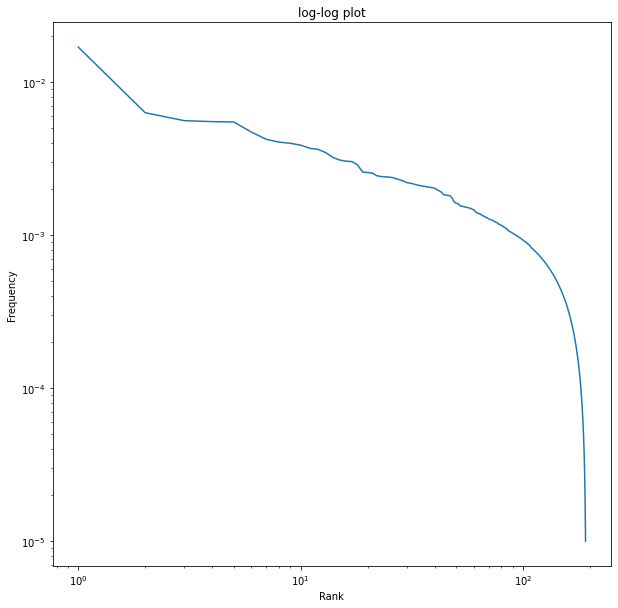

In [ ]:
plot_loglog(tf_2020)

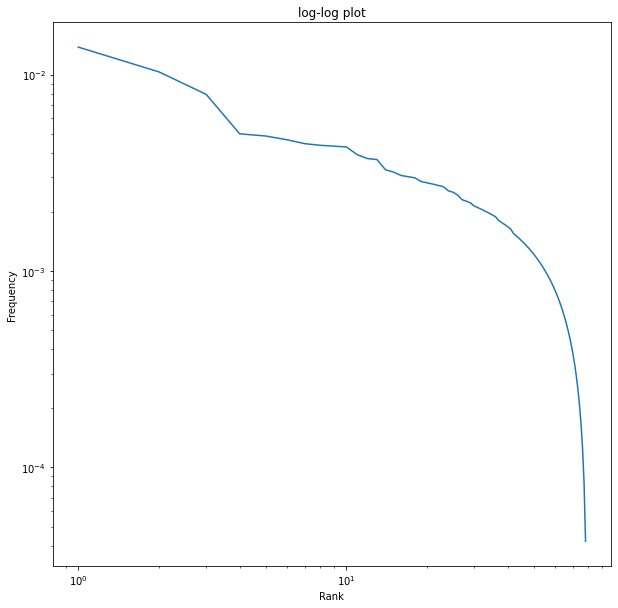

In [ ]:
plot_loglog(tf_2021)

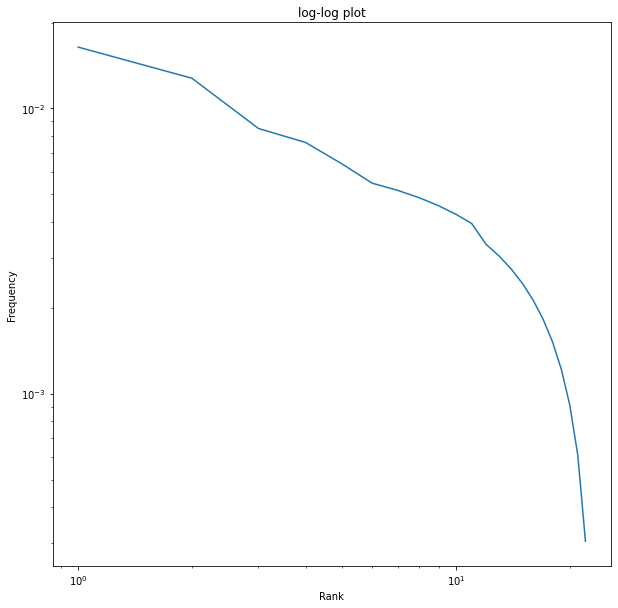

In [ ]:
plot_loglog(tf_2022)

5. Use TF-IDF to calculate and show the 5 most “important” words

In [26]:
# All the tweets in one year are considered as a document
# Get the whole "words" corpus from all years
total= set(word_2018_lem).union(set(word_2019_lem)).union(set(word_2020_lem)).union(set(word_2021_lem)).union(set(word_2022_lem))

wordDict_2018 = dict.fromkeys(total, 0) 
wordDict_2019 = dict.fromkeys(total, 0) 
wordDict_2020 = dict.fromkeys(total, 0) 
wordDict_2021 = dict.fromkeys(total, 0) 
wordDict_2022 = dict.fromkeys(total, 0)



In [33]:
# Get the Term occurance in total year corpus
def df(wordic,total):
   for word in total:
    wordic[word]+=1
   return wordic
   
df2018 = df(wordDict_2018,word_2018_lem)
df2019 = df(wordDict_2019,word_2019_lem)
df2020 = df(wordDict_2020,word_2020_lem)
df2021 = df(wordDict_2021,word_2021_lem)
df2022 = df(wordDict_2022,word_2022_lem)

all5_tc = pd.DataFrame([df2018,df2019,df2020,df2021,df2022])
all5_tc

,yolt,overvalued,matthew_nolan,nursing,fermilab,cubic,stock,ambien,third,slackmds,...,scbs,antiliberal,standup,wkrp,revitalization,thesithseth,car,jay_marquez,serverside,footwear
0,0,1,0,0,0,0,14,0,5,0,...,0,0,0,0,0,1,175,0,0,0
1,0,2,1,0,0,0,27,4,12,1,...,1,1,0,0,0,1,481,1,0,1
2,0,2,1,1,4,2,37,4,13,1,...,1,1,0,1,0,1,550,1,0,1
3,1,0,0,0,0,1,13,1,4,0,...,0,0,1,0,1,0,103,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,42,0,0,0


In [34]:
#Calculate the TF in total year corpus
def computeTF(wordDict, doc):
    tfDict = {}
    corpusCount = len(doc)
    for word, count in wordDict.items():
        tfDict[word] = count/float(corpusCount)
    return(tfDict)

In [35]:
tf2018 = computeTF(df2018, word_2018_lem)
tf2019 = computeTF(df2019, word_2019_lem)
tf2020 = computeTF(df2020, word_2020_lem)
tf2021 = computeTF(df2021, word_2021_lem)
tf2022 = computeTF(df2022, word_2022_lem)
all5_tf = pd.DataFrame([tf2018, tf2019,tf2020,tf2021,tf2022])
all5_tf

,yolt,overvalued,matthew_nolan,nursing,fermilab,cubic,stock,ambien,third,slackmds,...,scbs,antiliberal,standup,wkrp,revitalization,thesithseth,car,jay_marquez,serverside,footwear
0,0.000000,0.000046,0.000000,0.00000,0.00000,0.000000,0.000641,0.000000,0.000229,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000046,0.008009,0.000000,0.000000,0.000000
1,0.000000,0.000028,0.000014,0.00000,0.00000,0.000000,0.000376,0.000056,0.000167,0.000014,...,0.000014,0.000014,0.000000,0.00000,0.000000,0.000014,0.006700,0.000014,0.000000,0.000014
2,0.000000,0.000020,0.000010,0.00001,0.00004,0.000020,0.000371,0.000040,0.000130,0.000010,...,0.000010,0.000010,0.000000,0.00001,0.000000,0.000010,0.005512,0.000010,0.000000,0.000010
3,0.000042,0.000000,0.000000,0.00000,0.00000,0.000042,0.000547,0.000042,0.000168,0.000000,...,0.000000,0.000000,0.000042,0.00000,0.000042,0.000000,0.004330,0.000000,0.000042,0.000000
4,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.006379,0.000000,0.000000,0.000000


In [36]:
#Calculate the IDF in total year corpus
import math
def computeIDF(docList):
    N = len(docList)
    dfDict = dict.fromkeys(docList[0].keys(), 0)
    idfDict = {}
    # Get the DF values first
    for word in dfDict.keys():
        for doc_dict in docList:
            if doc_dict[word] > 0:
                dfDict[word] += 1

    for word, val in dfDict.items():
        idfDict[word] = math.log10((N + 1)/ (float(val) + 1))
    return(idfDict)

In [37]:
idfs = computeIDF([df2018, df2019,df2020,df2021,df2022])
idfs

{'yolt': 0.47712125471966244,
 'overvalued': 0.17609125905568124,
 'matthew_nolan': 0.3010299956639812,
 'nursing': 0.47712125471966244,
 'fermilab': 0.47712125471966244,
 'cubic': 0.3010299956639812,
 'stock': 0.07918124604762482,
 'ambien': 0.17609125905568124,
 'third': 0.07918124604762482,
 'slackmds': 0.3010299956639812,
 'feather': 0.17609125905568124,
 'seltzerplease': 0.3010299956639812,
 'image': 0.07918124604762482,
 'embed': 0.47712125471966244,
 'contact': 0.17609125905568124,
 'orangejamal': 0.17609125905568124,
 'chomsky': 0.3010299956639812,
 'nlrb': 0.17609125905568124,
 'beatrix': 0.47712125471966244,
 'nothin': 0.47712125471966244,
 'uzbekistan': 0.3010299956639812,
 'counterpoint': 0.17609125905568124,
 'daemon': 0.3010299956639812,
 'packetid': 0.3010299956639812,
 'tslagang': 0.47712125471966244,
 'benjaminpollock': 0.17609125905568124,
 'droneship': 0.07918124604762482,
 'refiring': 0.3010299956639812,
 'insufferable': 0.47712125471966244,
 'jamesdouma': 0.4771212

In [38]:
#Calculate the TF-IDF 
def computeTFIDF(tfBow, idfs):
    tfidf = {}
    for word, val in tfBow.items():
        tfidf[word] = val*idfs[word]
    return(tfidf)
#running our five year data through the IDF:
idf2018 = computeTFIDF(tf2018, idfs)
idf2019 = computeTFIDF(tf2019, idfs)
idf2020 = computeTFIDF(tf2020, idfs)
idf2021 = computeTFIDF(tf2021, idfs)
idf2022 = computeTFIDF(tf2022, idfs)
#putting it in a dataframe
idf= pd.DataFrame([idf2018, idf2019,idf2020,idf2021,idf2022])
tfidf = idf.copy()
tfidf.set_axis(['year2018', 'year2019', 'year2020','year2021','year2022'], inplace=True)
tfidf

/var/folders/th/k5zz5b0s7911bg8b9k8fwwwr0000gn/T/ipykernel_2538/1953837559.py:16: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  tfidf.set_axis(['year2018', 'year2019', 'year2020','year2021','year2022'], inplace=True)


,yolt,overvalued,matthew_nolan,nursing,fermilab,cubic,stock,ambien,third,slackmds,...,scbs,antiliberal,standup,wkrp,revitalization,thesithseth,car,jay_marquez,serverside,footwear
year2018,0.00000,0.000008,0.000000,0.000000,0.000000,0.000000,0.000051,0.000000,0.000018,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000008,0.0,0.000000,0.00000,0.000000
year2019,0.00000,0.000005,0.000004,0.000000,0.000000,0.000000,0.000030,0.000010,0.000013,0.000004,...,0.000004,0.000004,0.00000,0.000000,0.00000,0.000002,0.0,0.000004,0.00000,0.000004
year2020,0.00000,0.000004,0.000003,0.000005,0.000019,0.000006,0.000029,0.000007,0.000010,0.000003,...,0.000003,0.000003,0.00000,0.000005,0.00000,0.000002,0.0,0.000003,0.00000,0.000003
year2021,0.00002,0.000000,0.000000,0.000000,0.000000,0.000013,0.000043,0.000007,0.000013,0.000000,...,0.000000,0.000000,0.00002,0.000000,0.00002,0.000000,0.0,0.000000,0.00002,0.000000
year2022,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.0,0.000000,0.00000,0.000000


In [39]:
# Find the 5 most "important" word for each year by using the TF-IDF 

n=5 
frames = []

tfidf.T.apply(lambda x: frames.append(x.sort_values(ascending=False).head(n).index.tolist()), axis=0)
top5 = pd.DataFrame(frames, columns=['Most_important{}'.format(n+1) for n in range(n)])
top5.set_axis(['year2018', 'year2019', 'year2020','year2021','year2022'], inplace=True)
display(top5)


/var/folders/th/k5zz5b0s7911bg8b9k8fwwwr0000gn/T/ipykernel_2538/2927358751.py:8: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  top5.set_axis(['year2018', 'year2019', 'year2020','year2021','year2022'], inplace=True)


,Most_important1,Most_important2,Most_important3,Most_important4,Most_important5
year2018,robotbeat,fredericlambert,martinengwicht,lopezlinette,flamethrower
year2019,flcnhvy,teslamotors,tesla_truth,really,harrystoltz
year2020,flcnhvy,thirdrowtesla,teslamotors,ventilator,sn
year2021,wholemarsblog,billymk,itsallrisky,wapodavenport,doge
year2022,wholemarsblog,billymk,gailalfaratx,sawyermerritt,therealkeean
